# **DATA ANALYSIS** 

We start installing the required packages, and create the initial dataframe for our analysis

In [2]:
! pip install logomaker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 13.5 MB/s eta 0:00:00a 0:00:01


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import logomaker as lm


In [ ]:
df = pd.read_csv("../Data_Preparation/train_bench.tsv", sep="\t") 
df.head()

,EntryID,OrganismName,Kingdom,SequenceLength,HelixDomain,Class,SPStart,SPEnd,Set,Sequence
0,P32266,Saccharomyces cerevisiae (strain ATCC 204508 /...,Fungi,881,False,Negative,NaN,NaN,Benchmark,MNASPVRLLILRRQLATHPAILYSSPYIKSPLVHLHSRMSNVHRSA...
1,Q8N1N2,Homo sapiens,Metazoa,210,False,Negative,NaN,NaN,Benchmark,MVADIKGNEQIEKYSWREACDTGSSRMDRKHGKYILNVEHSENQPP...
2,Q94JY0,Arabidopsis thaliana,Viridiplantae,330,False,Negative,NaN,NaN,Benchmark,MGSISMHITPSTALPIRHFRARVSCCSSGHVSFIKDVAATEPPMHL...
3,Q8LDU1,Arabidopsis thaliana,Viridiplantae,321,False,Negative,NaN,NaN,Benchmark,MKSLVAHFSTPLITARLVPRCIIHRASISAVSFSTVRRRFSPLTMA...
4,Q9ZNT7,Arabidopsis thaliana,Viridiplantae,286,False,Negative,NaN,NaN,Benchmark,MSFNKVPNIPGAPALSALLKVSVIGGLGVYALTNSLYNVDGGHRAV...


## **Comparison of Sequence Lengths Between Positive and Negative Classes**

In [4]:
# Create DataFrames to compare sequence lengths between positive and negative classes in both the training set and the 
# benchmark set.


df_length = df[["SequenceLength","Class","Set"]]

bench = []
train = []

for _, row in df_length.iterrows():
    if row["Set"] == "Benchmark":
        bench.append(row)
        
    else:
        train.append(row)
        
        
df_train = pd.DataFrame(train)
df_bench = pd.DataFrame(bench)

# In df_train, the "Class" column lists positive samples first, followed by the negative ones. Since Seaborn assigns colors 
# according to the order of categories, this would otherwise result in inconsistent color mapping across plots (e.g., positives 
# in green in one plot and in red in another). 
# To ensure consistency and improve readability, we inverted the row order of df_bench so that in both dataframes positive 
# samples appear first and negatives afterwards.

df_bench = df_bench.sort_index(ascending=False).reset_index(drop=True)

In [7]:
print(df_train.tail())
print(df_train.head())

       SequenceLength     Class Set
10022             325  Negative   5
10023              81  Negative   5
10024             558  Negative   5
10025            1402  Negative   5
10026            2053  Negative   5
      SequenceLength     Class Set
2006              84  Positive   1
2007             229  Positive   1
2008             259  Positive   1
2009             439  Positive   1
2010             563  Positive   1


In [8]:
print(df_bench.tail())
print(df_bench.head())

      SequenceLength     Class        Set
2001             286  Negative  Benchmark
2002             321  Negative  Benchmark
2003             330  Negative  Benchmark
2004             210  Negative  Benchmark
2005             881  Negative  Benchmark
   SequenceLength     Class        Set
0             452  Positive  Benchmark
1              81  Positive  Benchmark
2             338  Positive  Benchmark
3             732  Positive  Benchmark
4              87  Positive  Benchmark


In [9]:
sns.set_theme()
sns.set_theme(
     context='talk',
     style='whitegrid',
     palette=["green","red"],
     font='sans-serif',
     font_scale=0.5,
     color_codes=True
    )

### **Protein Sequence Lengths in Training Set: Positive vs. Negative**

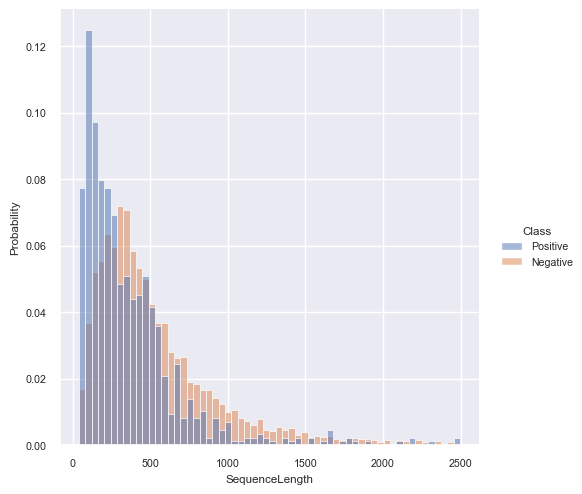

In [109]:
sns.displot(
    
     data = df_train[df_train["SequenceLength"]<=2500],
     x = "SequenceLength",
     hue = "Class",
     common_norm = False,
     stat = "probability",
   
    )
plt.savefig("Sequence_lengths_comparison/sequence_length_training.png", dpi=300, bbox_inches="tight")

In [110]:
# We decided to focus on sequences up to a length of 2500 residues to improve the readability of the plot. 
# Our goal is to compare the length distribution between positive and negative sequences of the Training Set. 
# As we can see, sequences longer than 2500 residues are very few and mostly belong to the positive class, which means they do not 
# provide useful information for the comparison.

df_train.loc[(df_train["SequenceLength"] > 2500) & (df_train["Class"] == "Positive")]

,SequenceLength,Class,Set
2014,2813,Positive,1
2063,2530,Positive,1
2121,3351,Positive,1
2163,3083,Positive,1
2166,3380,Positive,1
2206,2586,Positive,2
2288,3330,Positive,2
2392,3396,Positive,3
2857,2692,Positive,5


In [111]:
df_train.loc[(df_train["SequenceLength"] > 2500) & (df_train["Class"] == "Negative")]

,SequenceLength,Class,Set
2962,2843,Negative,1
2981,3418,Negative,1
3032,2603,Negative,1
3104,2567,Negative,1
3222,2715,Negative,1
...,...,...,...
9419,4226,Negative,5
9519,3433,Negative,5
9534,2856,Negative,5
9655,8797,Negative,5


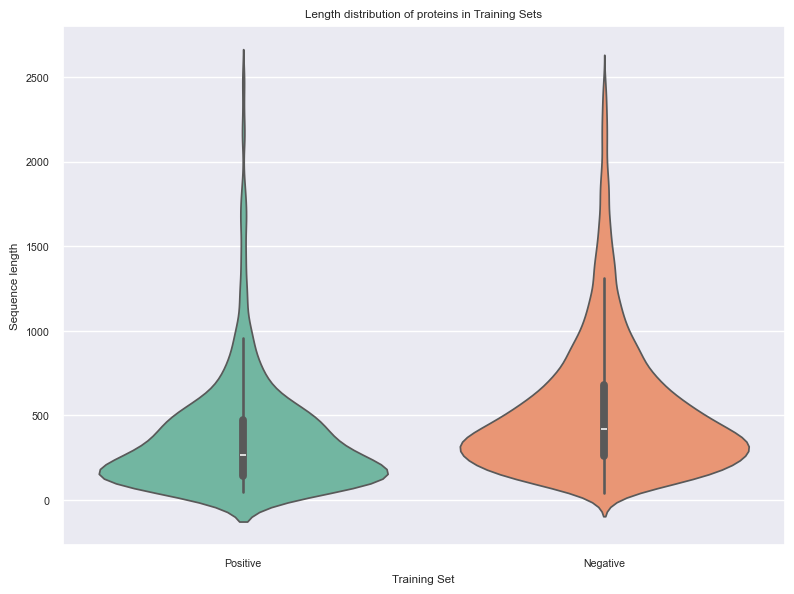

<Figure size 640x480 with 0 Axes>

In [112]:
df_train_filtered_low = df_train.loc[df_train["SequenceLength"] < 2500]
df_train_filtered_low 
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df_train_filtered_low,
    x="Class",                  # Positive vs negative
    y="SequenceLength",       # lenght distribution
    hue="Class",             
    palette="Set2",
    split=False,
    inner="box"               # boxplot
)

plt.title("Length distribution of proteins in Training Sets")
plt.ylabel("Sequence length")
plt.xlabel("Training Set")
plt.tight_layout()
plt.show()
plt.savefig("Sequence_lengths_comparison/Violin_plot_training_distribution.png", dpi=300, bbox_inches="tight")

### **Protein Sequence Lengths in Benchmark Set: Positive vs. Negative**

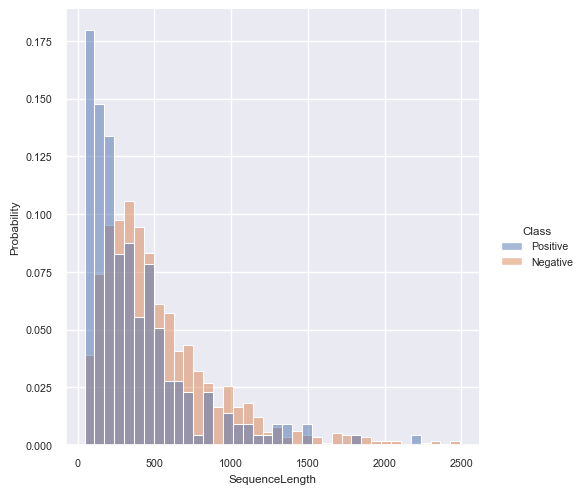

In [113]:
sns.displot(
    
     data = df_bench[df_bench["SequenceLength"]<=2500],
     x = "SequenceLength",
     hue = "Class",
     common_norm = False,
     stat = "probability"
    
    )

plt.savefig("Sequence_lengths_comparison/sequence_length_benchmark.png", dpi=300, bbox_inches="tight")

In [114]:
# We decided to focus on sequences up to a length of 2500 residues to improve the readability of the plot. 
# Our goal is to compare the length distribution between positive and negative sequences of the Benchmark Set. 
# As we can see, sequences longer than 2500 residues are very few and mostly belong to the positive class, which means 
# they do not provide useful information for the comparison.

df_bench.loc[df_bench["SequenceLength"] > 2500]

,SequenceLength,Class,Set
16,5263,Positive,Benchmark
52,2898,Positive,Benchmark
264,3046,Negative,Benchmark
387,3122,Negative,Benchmark
627,2531,Negative,Benchmark
927,2684,Negative,Benchmark
1117,2752,Negative,Benchmark
1172,2618,Negative,Benchmark
1348,6548,Negative,Benchmark
1358,4062,Negative,Benchmark


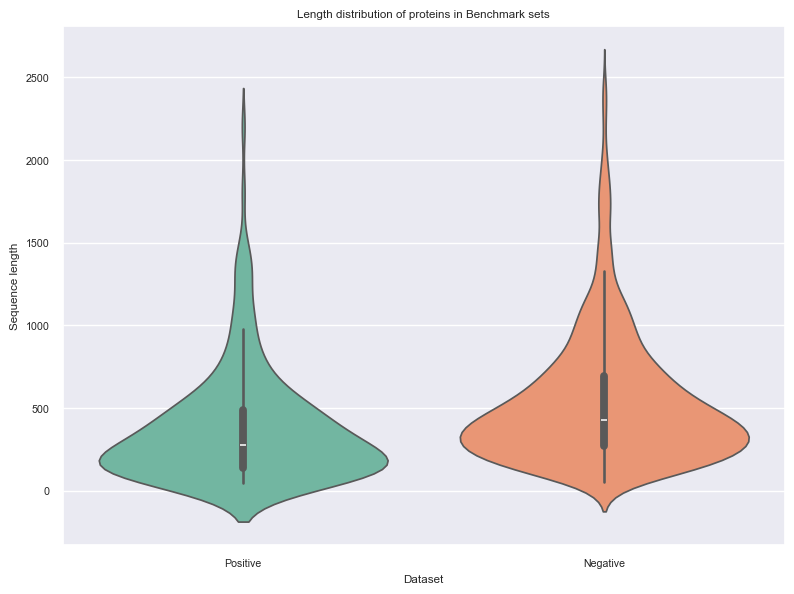

<Figure size 640x480 with 0 Axes>

In [115]:

df_benchmark_filtered = df_bench.loc[df_bench["SequenceLength"] < 2500]
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df_benchmark_filtered,
    x="Class",                  # Train vs Benchmark
    y="SequenceLength",       # distribuzione lunghezze
    hue="Class",              # Positive vs Negative
    palette="Set2",
    split=False,
    inner="box"               # aggiunge il boxplot dentro al violino
)

plt.title("Length distribution of proteins in Benchmark sets")
plt.ylabel("Sequence length")
plt.xlabel("Dataset")
plt.tight_layout()
plt.show()
plt.savefig("Sequence_lengths_comparison/Violin_plot_benchmark.png", dpi=300, bbox_inches="tight")


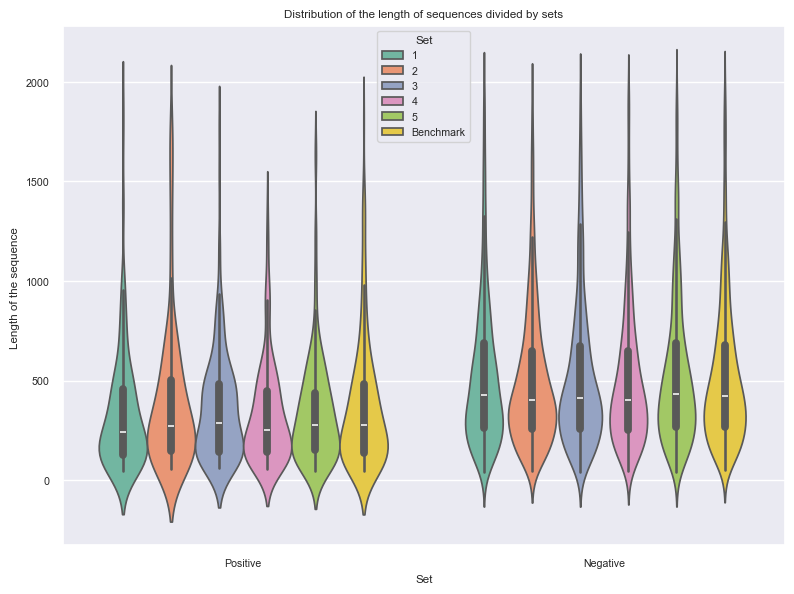

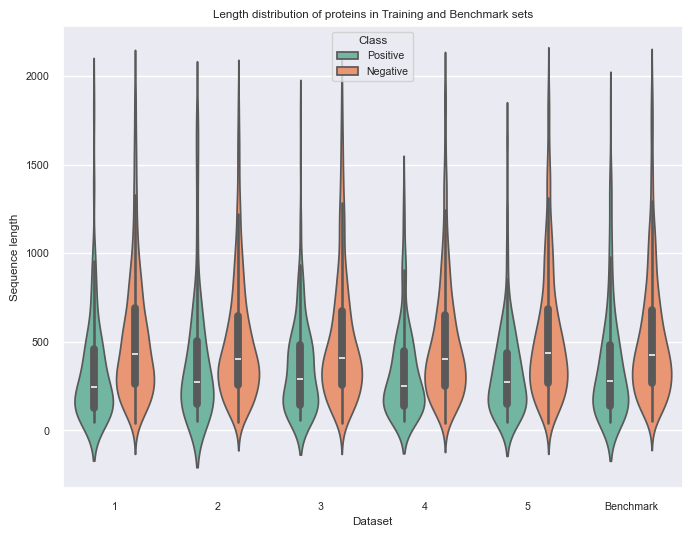

In [117]:
#since the majority of proteins has a length lower than 5000 aa, we can filter out and plot all the proteins with lower length
df_train_filtered_lower = df_train.loc[df_train["SequenceLength"] < 2000]
df_bench_filtered_lower = df_bench.loc[df_bench["SequenceLength"] < 2000]


#we can visualise the differences among lengths distribution of positive and negative proteins
#dividing by the sets we created, specifically the Benchmark set and the five subsets of the training. 
#violin plot

df_lengths_filtered = pd.concat([df_train_filtered_lower, df_bench_filtered_lower], ignore_index = True)

plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df_lengths_filtered,
    x="Class",
    y="SequenceLength",
    hue="Set",   # coloring per different classes
    palette="Set2",   
    inner="box"    # boxplot
)
plt.savefig("Sequence_lengths_comparison/Violin_plot_set_division_2.png", dpi=300, bbox_inches="tight")

plt.title("Distribution of the length of sequences divided by sets")
plt.ylabel("Length of the sequence ")
plt.xlabel("Set")
plt.tight_layout()
plt.show()
#we can show de differences among the classes
plt.figure(figsize=(8, 6))
sns.violinplot(
    data= df_lengths_filtered,
    x="Set",                  # Train vs Benchmark
    y="SequenceLength",       # distribuzione lunghezze
    hue="Class",              # Positive vs Negative
    palette="Set2",
    split=False,
    inner="box"               # aggiunge il boxplot dentro al violino
)

plt.title("Length distribution of proteins in Training and Benchmark sets")
plt.ylabel("Sequence length")
plt.xlabel("Dataset")
plt.legend(title="Class")     # legenda automatica basata su hue
plt.tight_layout
plt.savefig("Sequence_lengths_comparison/Violin_plot_set_division.png", dpi=300, bbox_inches="tight")

## **Comparison of Signal Peptide (SP) Lengths**

In [118]:
# Create DataFrames to compare SP lengths in positive proteins between the training set and the benchmark set.

df_SP_length = df[["SequenceLength","Class","Set","SPEnd"]]

SP_dataset = []


for _, row in df_SP_length.iterrows():
    if pd.notna(row["SPEnd"]):
        SP_dataset.append(row)
        
    else:
        continue
    
        
        
df_SP_dataset = pd.DataFrame(SP_dataset)

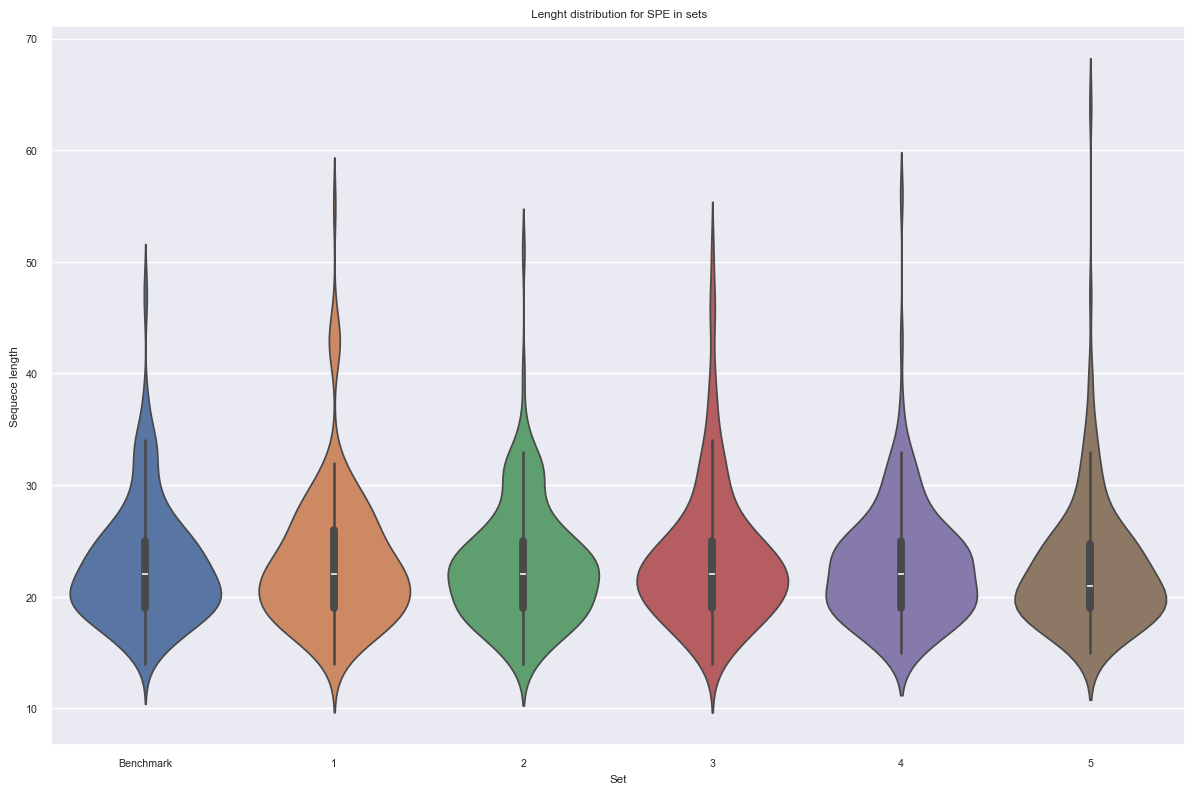

<Figure size 640x480 with 0 Axes>

In [119]:
#We can check for the distirbution of SP lenghts in the different subsets and the benchmark set 
plt.figure(figsize=(12, 8))
sns.violinplot(
    data=df_SP_dataset,
    x = "Set", 
    y="SPEnd",
   hue="Set",   
    #palette="Set2",   
    inner="box",          # adding boxplot
    split=False,         
    common_norm=False     # normalizing groups separately
)

plt.title(" Lenght distribution for SPE in sets")
plt.xlabel("Set")
plt.ylabel("Sequece length")
plt.tight_layout()
plt.show()
plt.savefig("Sequence_lengths_comparison/Violin_plot_SPE_distribution.png", dpi=300, bbox_inches="tight")

In [120]:
df_SP_dataset["SPEnd"].dtype

dtype('float64')

In [121]:
df_SP_dataset

,SequenceLength,Class,Set,SPEnd
1787,311,Positive,Benchmark,32.0
1788,136,Positive,Benchmark,24.0
1789,150,Positive,Benchmark,20.0
1790,161,Positive,Benchmark,20.0
1791,69,Positive,Benchmark,23.0
...,...,...,...,...
2875,152,Positive,5,30.0
2876,539,Positive,5,28.0
2877,70,Positive,5,23.0
2878,1257,Positive,5,19.0


In [122]:
# Replace numeric subset values in the "Set" column with "Training" for proteins belonging to the training set

df_SP_dataset.loc[df_SP_dataset["Set"] != "Benchmark", "Set"] = "Training"

In [123]:
df_SP_dataset["Set"].unique()

array(['Benchmark', 'Training'], dtype=object)

In [124]:
df_SP_dataset

,SequenceLength,Class,Set,SPEnd
1787,311,Positive,Benchmark,32.0
1788,136,Positive,Benchmark,24.0
1789,150,Positive,Benchmark,20.0
1790,161,Positive,Benchmark,20.0
1791,69,Positive,Benchmark,23.0
...,...,...,...,...
2875,152,Positive,Training,30.0
2876,539,Positive,Training,28.0
2877,70,Positive,Training,23.0
2878,1257,Positive,Training,19.0


In [125]:
sns.set_theme()
sns.set_theme(
     context='talk',
     style='whitegrid',
     palette=["lightblue","magenta"],
     font='sans-serif',
     font_scale=0.5,
     color_codes=True
    )

### **Signal Peptide (SP) Lengths in Training vs. Benchmark Sets**

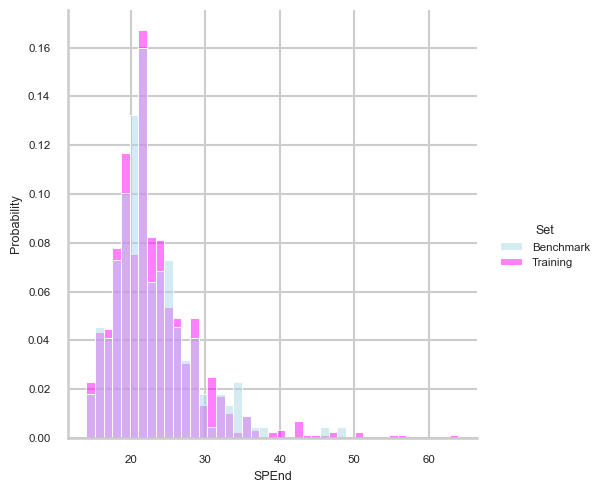

In [126]:
sns.displot(
    
     data = df_SP_dataset,
     x = "SPEnd",
     hue = "Set",
     common_norm = False,
     stat = "probability"
    
    )

plt.savefig("Sequence_lengths_comparison/sp_length_train_vs_bench.png", dpi=300, bbox_inches="tight")

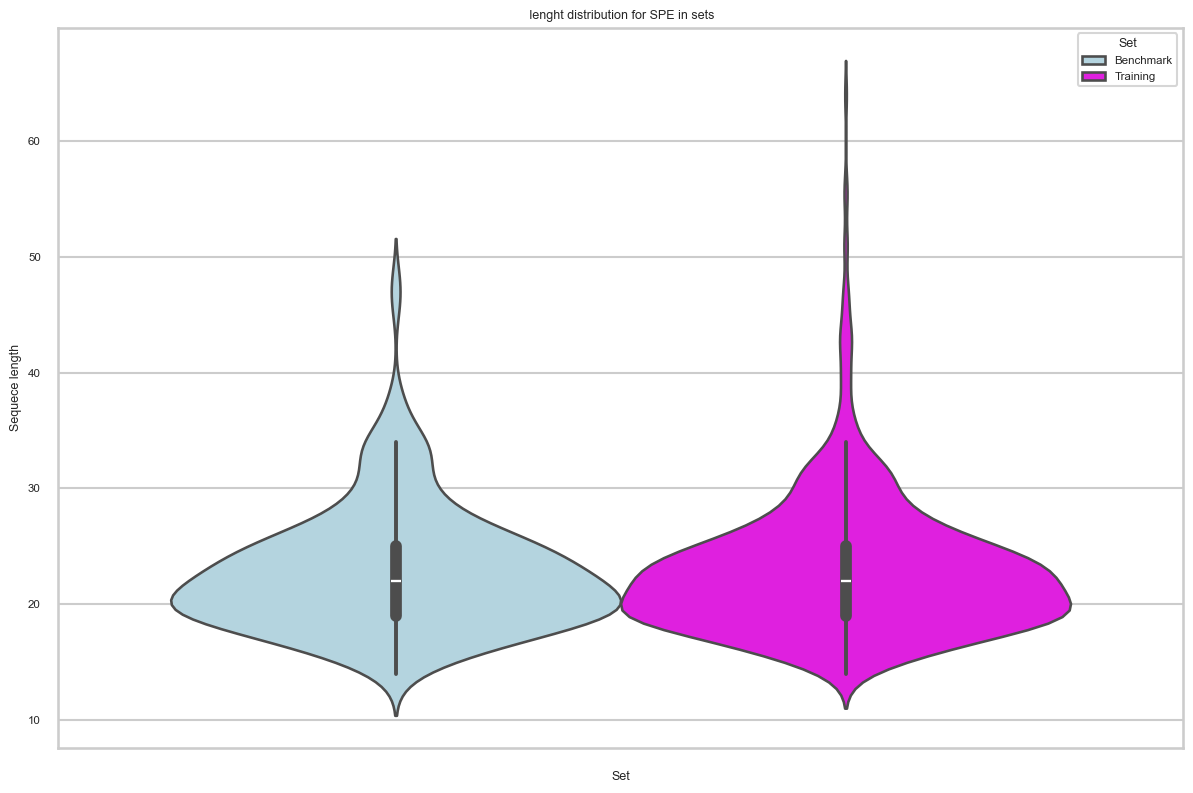

<Figure size 640x480 with 0 Axes>

In [127]:
plt.figure(figsize=(12, 8))
sns.violinplot(
    data=df_SP_dataset,
    y="SPEnd",
    hue="Set",   
    #palette="Set2",   
    inner="box",          # adding boxplot
    split=False,         
    common_norm=False     # normalizing groups separately
)

plt.title(" lenght distribution for SPE in sets")
plt.xlabel("Set")
plt.ylabel("Sequece length")
plt.legend(title="Set")
plt.tight_layout()
plt.show()
plt.savefig("Sequence_lengths_comparison/Violin_plot_distribution.png", dpi=300, bbox_inches="tight")

## **Comparison between the aminoacidic frequencies of the SP in our dataset and the aminoacidic frequencies of SwissProt**

### Step1: compute the aa frequencies of the SPs in our dataset

In [128]:
#set the theme
sns.set_theme(
    context="paper",
    style="darkgrid",
    palette="deep",
    font="sans-serif",
    font_scale=1,
    color_codes=True,
    rc=None    
)

In [ ]:
# take the .tsv with all the data and put it in a dataframe
df=pd.read_csv("../Data_Preparation/train_bench.tsv" , sep="\t")
print(len(df))
df.head()

10027


,EntryID,OrganismName,Kingdom,SequenceLength,HelixDomain,Class,SPStart,SPEnd,Set,Sequence
0,P32266,Saccharomyces cerevisiae (strain ATCC 204508 /...,Fungi,881,False,Negative,NaN,NaN,Benchmark,MNASPVRLLILRRQLATHPAILYSSPYIKSPLVHLHSRMSNVHRSA...
1,Q8N1N2,Homo sapiens,Metazoa,210,False,Negative,NaN,NaN,Benchmark,MVADIKGNEQIEKYSWREACDTGSSRMDRKHGKYILNVEHSENQPP...
2,Q94JY0,Arabidopsis thaliana,Viridiplantae,330,False,Negative,NaN,NaN,Benchmark,MGSISMHITPSTALPIRHFRARVSCCSSGHVSFIKDVAATEPPMHL...
3,Q8LDU1,Arabidopsis thaliana,Viridiplantae,321,False,Negative,NaN,NaN,Benchmark,MKSLVAHFSTPLITARLVPRCIIHRASISAVSFSTVRRRFSPLTMA...
4,Q9ZNT7,Arabidopsis thaliana,Viridiplantae,286,False,Negative,NaN,NaN,Benchmark,MSFNKVPNIPGAPALSALLKVSVIGGLGVYALTNSLYNVDGGHRAV...


In [130]:
# to keep only SP entries, keep sequences that have either SPStart and SPEnd column values different from null. 
sp_df=df[df["SPStart"].notna()]
print(len(sp_df))
sp_df.head()

1093


,EntryID,OrganismName,Kingdom,SequenceLength,HelixDomain,Class,SPStart,SPEnd,Set,Sequence
1787,Q9H7M9,Homo sapiens,Metazoa,311,NaN,Positive,1.0,32.0,Benchmark,MGVPTALEAGSWRWGSLLFALFLAASLGPVAAFKVATPYSLYVCPE...
1788,Q8SXL2,Drosophila melanogaster,Metazoa,136,NaN,Positive,1.0,24.0,Benchmark,MKSTISLLLVVICTVVLAAQQSQAKKGCQAYGHVCYGGHGKRSLSP...
1789,P27731,Gallus gallus,Metazoa,150,NaN,Positive,1.0,20.0,Benchmark,MAFHSTLLVFLAGLVFLSEAAPLVSHGSVDSKCPLMVKVLDAVRGS...
1790,P31419,Manduca sexta,Metazoa,161,NaN,Positive,1.0,20.0,Benchmark,MVNRLILMVVVVFITDSVMGTAEVMSHVTAHFGKALEECREESGLP...
1791,Q8MVA6,Ixodes scapularis,Metazoa,69,NaN,Positive,1.0,23.0,Benchmark,MRAVAIFIVTLLVLECVYFVMSEPDPGQPWQVKAGRPPCYSIPCRK...


In [131]:
# reduce the dataframe to keep only the columns of interest
sp_seqs=sp_df[["EntryID" , "Sequence" , "SPStart" , "SPEnd" , "Set"]]
print(len(sp_seqs))
sp_seqs.head()

1093


,EntryID,Sequence,SPStart,SPEnd,Set
1787,Q9H7M9,MGVPTALEAGSWRWGSLLFALFLAASLGPVAAFKVATPYSLYVCPE...,1.0,32.0,Benchmark
1788,Q8SXL2,MKSTISLLLVVICTVVLAAQQSQAKKGCQAYGHVCYGGHGKRSLSP...,1.0,24.0,Benchmark
1789,P27731,MAFHSTLLVFLAGLVFLSEAAPLVSHGSVDSKCPLMVKVLDAVRGS...,1.0,20.0,Benchmark
1790,P31419,MVNRLILMVVVVFITDSVMGTAEVMSHVTAHFGKALEECREESGLP...,1.0,20.0,Benchmark
1791,Q8MVA6,MRAVAIFIVTLLVLECVYFVMSEPDPGQPWQVKAGRPPCYSIPCRK...,1.0,23.0,Benchmark


In [132]:
# inizialise two dictionaries that contain all the proteogenic aa. One for benchmark and one for training
aa_bench = { "A" : 0 , "R" : 0 , "N" : 0 , "D" : 0 , "C" : 0 , "Q" : 0, "E" : 0, "G" : 0, "H" : 0, "I" : 0 ,"L" : 0, "K" : 0, "M" : 0, "F" : 0, "P" : 0, "S" : 0, "T" : 0, "W" : 0, "Y" : 0 , "V": 0}
aa_train = { "A" : 0 , "R" : 0 , "N" : 0 , "D" : 0 , "C" : 0 , "Q" : 0, "E" : 0, "G" : 0, "H" : 0, "I" : 0 ,"L" : 0, "K" : 0, "M" : 0, "F" : 0, "P" : 0, "S" : 0, "T" : 0, "W" : 0, "Y" : 0 , "V": 0}

# inizialise the total count of the residues in the sequences
total_residues_bench = 0
total_residues_train = 0
for index , row in sp_seqs.iterrows():
    start = int(row["SPStart"])
    end = int(row["SPEnd"])
    #slice the sequence to the interval that contains the signal peptide
    signal_peptide_seq = str(row["Sequence"])
    signal_peptide_seq = signal_peptide_seq[start-1:end] #we put start -1 because the index needs to start at 0
    # count the residues in the current sequence
    for residue in signal_peptide_seq:
        if residue in aa_bench.keys() and row["Set"] == "Benchmark":
            aa_bench[residue] = aa_bench[residue] + 1
            total_residues_bench = total_residues_bench + 1
        elif residue in aa_train.keys() and row["Set"] in "12345":
            aa_train[residue] = aa_train[residue] + 1
            total_residues_train = total_residues_train +1
            
print(aa_bench , total_residues_bench)     
print(aa_train , total_residues_train)
#now we have both the total number of residues for training and bench and a dictionary containing single residue data.

{'A': 674, 'R': 167, 'N': 49, 'D': 43, 'C': 153, 'Q': 110, 'E': 76, 'G': 335, 'H': 54, 'I': 213, 'L': 1127, 'K': 117, 'M': 319, 'F': 237, 'P': 174, 'S': 355, 'T': 235, 'W': 84, 'Y': 47, 'V': 422} 4991
{'A': 2901, 'R': 642, 'N': 201, 'D': 172, 'C': 570, 'Q': 400, 'E': 257, 'G': 1166, 'H': 225, 'I': 920, 'L': 4364, 'K': 437, 'M': 1265, 'F': 1016, 'P': 850, 'S': 1529, 'T': 881, 'W': 362, 'Y': 208, 'V': 1655} 20021


In [133]:
# divide every entry of the dictionary for the total number of residues to obtain the frequency
for residue in aa_bench.keys():
    aa_bench[residue] = aa_bench[residue] / total_residues_bench
for residue in aa_train.keys():
    aa_train[residue] = aa_train[residue] / total_residues_train
print(aa_train)
print(aa_bench)

{'A': 0.14489785724988763, 'R': 0.03206633035312922, 'N': 0.010039458568503072, 'D': 0.008590979471554867, 'C': 0.028470106388292293, 'Q': 0.019979022026871785, 'E': 0.012836521652265122, 'G': 0.05823884920833125, 'H': 0.011238199890115378, 'I': 0.0459517506618051, 'L': 0.21797113031317117, 'K': 0.021827081564357424, 'M': 0.06318365715998202, 'F': 0.050746715948254334, 'P': 0.042455421807102545, 'S': 0.0763698116977174, 'T': 0.0440037960141851, 'W': 0.018081014934318965, 'Y': 0.010389091453973327, 'V': 0.08266320363618201}
{'A': 0.13504307753957123, 'R': 0.033460228411140054, 'N': 0.009817671809256662, 'D': 0.008615507914245642, 'C': 0.030655179322781004, 'Q': 0.022039671408535362, 'E': 0.015227409336806252, 'G': 0.0671208174714486, 'H': 0.010819475055099179, 'I': 0.0426768182728912, 'L': 0.22580645161290322, 'K': 0.023442195952714885, 'M': 0.06391504708475255, 'F': 0.047485473852935285, 'P': 0.03486275295531958, 'S': 0.07112803045481868, 'T': 0.04708475255459828, 'W': 0.01683029453015

In [134]:
# as a safety check compute the sum of the frequencies, it should equal 1
freq_train_tot = 0
freq_bench_tot = 0
for residue in aa_bench.keys():
    freq_bench_tot = freq_bench_tot + aa_bench[residue] 
for residue in aa_train.keys():
    freq_train_tot = freq_train_tot + aa_train[residue]
print (freq_train_tot , freq_bench_tot) 

1.0 1.0


### Step2: create a dataframe with the aminoacidic frequencies to subsequently build the plot

In [29]:
# create a dictionary with the aminoacidic frequencies of the swiss prot
#   Ala (A) 8.25   Gln (Q) 3.93   Leu (L) 9.64   Ser (S) 6.65
#
#   Arg (R) 5.52   Glu (E) 6.71   Lys (K) 5.79   Thr (T) 5.36
#
#   Asn (N) 4.06   Gly (G) 7.07   Met (M) 2.41   Trp (W) 1.10
#
#   Asp (D) 5.46   His (H) 2.27   Phe (F) 3.86   Tyr (Y) 2.92
#
#   Cys (C) 1.38   Ile (I) 5.90   Pro (P) 4.74   Val (V) 6.85

In [135]:
swiss_frequencies = { "A" : 0.0825 , "R" : 0.0552 , "N" : 0.0406 , "D" : 0.0546 , "C" : 0.0138 , "Q" : 0.0393, "E" : 0.0671, "G" : 0.0707, "H" : 0.0227, "I" : 0.0590 ,"L" : 0.0964, "K" : 0.0579, "M" : 0.0241, "F" : 0.0386, "P" : 0.0474, "S" : 0.0665, "T" : 0.0536, "W" : 0.0110, "Y" : 0.0292 , "V": 0.0685}

In [136]:
# create the dataframes
bench_df = pd.DataFrame(aa_bench.items(), columns=["Residue", "Frequency"])
bench_df["Database"] = "Benchmark"
train_df = pd.DataFrame(aa_train.items(), columns=["Residue", "Frequency"])
train_df["Database"] = "Training"
swiss_df = pd.DataFrame(swiss_frequencies.items(), columns=["Residue", "Frequency"])
swiss_df["Database"] = "SwissProt"
bench_df.head()

,Residue,Frequency,Database
0,A,0.135043,Benchmark
1,R,0.033460,Benchmark
2,N,0.009818,Benchmark
3,D,0.008616,Benchmark
4,C,0.030655,Benchmark


In [137]:
# merge training and swissprot dataframes and benchmark and swissprot dataframes to obtain final dataframes we need
train_final = pd.concat([train_df , swiss_df], ignore_index=True)
bench_final = pd.concat([bench_df , swiss_df], ignore_index=True)
bench_final.head()

,Residue,Frequency,Database
0,A,0.135043,Benchmark
1,R,0.033460,Benchmark
2,N,0.009818,Benchmark
3,D,0.008616,Benchmark
4,C,0.030655,Benchmark


In [138]:
bench_final.tail()

,Residue,Frequency,Database
35,S,0.0665,SwissProt
36,T,0.0536,SwissProt
37,W,0.0110,SwissProt
38,Y,0.0292,SwissProt
39,V,0.0685,SwissProt


In [139]:
bench_final.query("Residue == 'A'")

,Residue,Frequency,Database
0,A,0.135043,Benchmark
20,A,0.082500,SwissProt


### Step3: Create the plot

In [140]:
# define categories of aminoacids
groups = {
    "Apolar":   ["G","A","V","P","L","I","M"],
    "Aromatic": ["F","W","Y"],
    "Polar":    ["S","T","C","N","Q","H"],
    "Charged":  ["D","E","K","R"],
}
# create a list with the correct order for the aminoacids
ordered_residues = sum(groups.values(), [])

In [141]:
from matplotlib.lines import Line2D

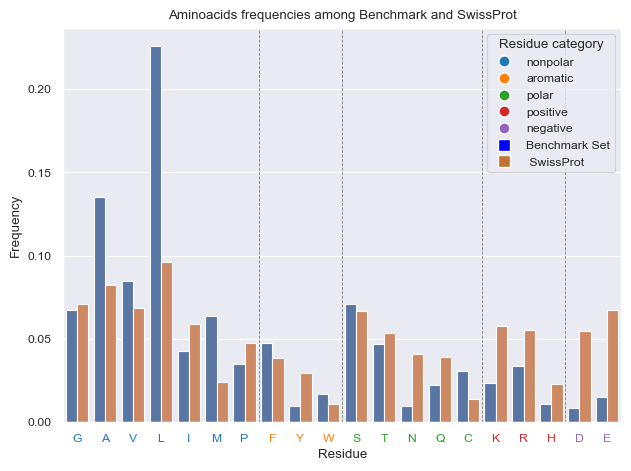

<Figure size 640x480 with 0 Axes>

In [142]:

df = bench_final
# we can cathegorize our ammino acid on the x axis using their phisical-chemical characteristics
#  categorical map for aa depending on their phisical_chemical characteristics
aa_categories = {
    # nonpolar aliphatic
    'nonpolar': list("GAVLIMP"),   # gly, ala, val, leu, ile, met, pro
    # aromatic
    'aromatic': list("FYW"),       # phe, tyr, trp
    # polar uncharged
    'polar': list("STNQC"),        # ser, thr, asn, gln, cys (C included as polar)
    # positive
    'positive': list("KRH"),       # lys, arg, his
    # negative
    'negative': list("DE"),        # asp, glu
}
#ordered list of amminoacids
aa_order = [
    'G','A','V','L','I','M','P',   # nonpolar
    'F','Y','W',                   # aromatic
    'S','T','N','Q','C',           # polar
    'K','R','H',                   # positive
    'D','E'                        # negative
]


#we map each residue as a cathegories to color etikes later
res_to_cat = {aa: cat for cat, aas in aa_categories.items() for aa in aas}

bench_plot = sns.barplot(
 data=bench_final,
 x="Residue",
 y="Frequency",
 hue="Database",
 order = aa_order,
)
#column residue imust be Categorical and ordered
df['Residue'] = pd.Categorical(df['Residue'], categories=aa_order, ordered=True)

# xtick labels are colored based on categories 
cat_colors = {'nonpolar':'#1f77b4', 'aromatic':'#ff7f0e', 'polar':'#2ca02c', 'positive':'#d62728', 'negative':'#9467bd'}
for label in bench_plot.get_xticklabels():
    aa = label.get_text()
    cat = res_to_cat.get(aa, None)
    if cat:
        label.set_color(cat_colors[cat])

# we add lines between categories, finding indexes (xvals where categories changes)
group_boundaries = []
current_cat = None
for i, aa in enumerate(aa_order):
    cat = res_to_cat[aa]
    if current_cat is None:
        current_cat = cat
    elif cat != current_cat:
        group_boundaries.append(i - 0.5)  # position btw tick i-1 e i
        current_cat = cat

for x in group_boundaries:
    bench_plot.axvline(x=x, color='gray', linestyle='--', linewidth=0.6)

#we created specific handles for the legend (a colored point for each cathegries) 
legend_handles = [Line2D([0], [0], marker='o', color='w', 
                         markerfacecolor=color, markersize=8, linestyle='') 
                  for color in cat_colors.values()]


#corresponding lables 
legend_labels = list(cat_colors.keys())
# adding two handle quadrati per training e test
set_handles = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=8, linestyle=''),
    Line2D([0], [0], marker='s', color='w', markerfacecolor="#c17431", markersize=8, linestyle='')
]
set_labels = ['Benchmark Set', ' SwissProt']

# Uniamo tutti gli handle e le label
legend_handles += set_handles
legend_labels += set_labels


# adding legend to the plot
plt.legend(handles=legend_handles, labels=legend_labels, title="Residue category", loc='upper right')
#bench_plot.set_xlabel("Residue")
#bench_plot.set_ylabel("Frequency")
plt.title("Aminoacids frequencies among Benchmark and SwissProt")
plt.tight_layout()
plt.show()
plt.savefig("Sequence_lengths_comparison/frequencies_sp_bench_vs_swissprot_aacategories.png", dpi=300, bbox_inches="tight")



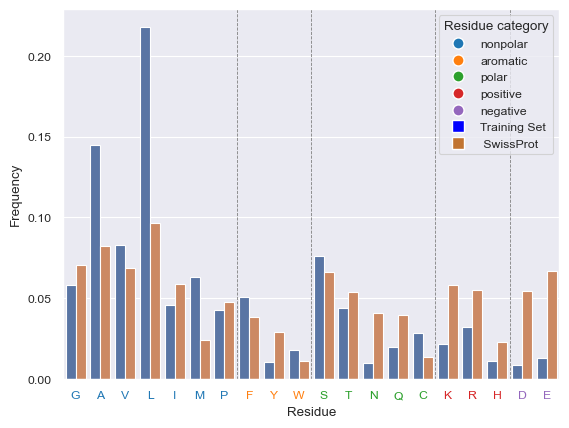

In [76]:
train_plot = sns.barplot(
 data=train_final,
 x="Residue",
 y="Frequency",
 hue="Database",
 order=aa_order,
 
)
#adding vertical lines
for x in group_boundaries:
    train_plot.axvline(x=x, color='gray', linestyle='--', linewidth=0.6)
# xtick labels are colored based on categories 
cat_colors = {'nonpolar':'#1f77b4', 'aromatic':'#ff7f0e', 'polar':'#2ca02c', 'positive':'#d62728', 'negative':'#9467bd'}
for label in train_plot.get_xticklabels():
    aa = label.get_text()
    cat = res_to_cat.get(aa, None)
    if cat:
        label.set_color(cat_colors[cat])

#we created specific handles for the legend (a colored point for each cathegries) 
legend_handles_1 = [Line2D([0], [0], marker='o', color='w', 
                         markerfacecolor=color, markersize=8, linestyle='') 
                  for color in cat_colors.values()]


#corresponding lables 
legend_labels_1 = list(cat_colors.keys())
# adding two handle quadrati per training e test
set_handles_1 = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=8, linestyle=''),
    Line2D([0], [0], marker='s', color='w', markerfacecolor="#c17431", markersize=8, linestyle='')
]
set_labels_1 = ['Training Set', ' SwissProt']

# Uniamo tutti gli handle e le label
legend_handles_1 += set_handles_1
legend_labels_1 += set_labels_1

# adding legend to the plot
plt.legend(handles=legend_handles_1, labels=legend_labels_1, title="Residue category", loc='upper right')
plt.savefig("frequencies_sp_train_vs_swissprot.png", dpi=300, bbox_inches="tight")

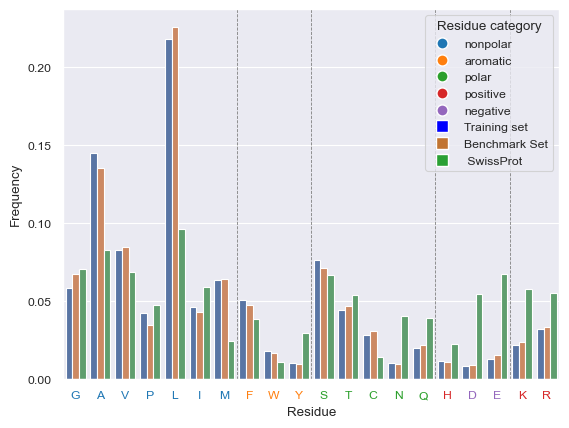

In [144]:
total_final = pd.concat([train_df , bench_df , swiss_df] , ignore_index=True)
total_plot = sns.barplot(
 data=total_final,
 x="Residue",
 y="Frequency",
 hue="Database",
 order=ordered_residues,
)
#adding vertical lines
for x in group_boundaries:
    total_plot.axvline(x=x, color='gray', linestyle='--', linewidth=0.6)

# xtick labels are colored based on categories 
cat_colors = {'nonpolar':'#1f77b4', 'aromatic':'#ff7f0e', 'polar':'#2ca02c', 'positive':'#d62728', 'negative':'#9467bd'}
for label in total_plot.get_xticklabels():
    aa = label.get_text()
    cat = res_to_cat.get(aa, None)
    if cat:
        label.set_color(cat_colors[cat])

    
#we created specific handles for the legend (a colored point for each cathegries) 
legend_handles_2 = [Line2D([0], [0], marker='o', color='w', 
                         markerfacecolor=color, markersize=8, linestyle='') 
                  for color in cat_colors.values()]

#corresponding lables 
legend_labels_2 = list(cat_colors.keys()) 
# adding two handle quadrati per training e test
set_handles_2 = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=8, linestyle=''),
    Line2D([0], [0], marker='s', color='w', markerfacecolor="#c17431", markersize=8, linestyle=''),
    Line2D([0], [0], marker='s', color='w', markerfacecolor="#2aa034", markersize=8, linestyle='')
]
set_labels_2 = ["Training set", 'Benchmark Set', ' SwissProt']

# Uniamo tutti gli handle e le label
legend_handles_2 += set_handles_2
legend_labels_2 += set_labels_2

# adding legend to the plot
plt.legend(handles=legend_handles_2, labels=legend_labels_2, title="Residue category", loc='upper right')
plt.savefig("Sequence_lengths_comparison/frequencies_sp_train_vs_swissprot.png", dpi=300, bbox_inches="tight")

In [ ]:
df=pd.read_csv("../Data_Preparation/train_bench.tsv", sep="\t")
df
print("Number of OrganismName unique values: ",df["OrganismName"].nunique())


Number of OrganismName unique values:  435


In [ ]:
#Recover the ten most frequent OrganismName to make the unique value number of OrganismName field comparable to Kingdom field unique value number
tmp_var=df.groupby('OrganismName').nunique().sort_values(by='EntryID', ascending=False).head(6).reset_index()
tmp_most_rep=tmp_var['OrganismName'].tolist()
df.loc[~df["OrganismName"].isin(tmp_most_rep), "OrganismName"] = "Other"
print("Number of OrganismName unique values: ",df["OrganismName"].nunique())

## **DISTRIBUTION OF AMINOACIDS DEPENDING ON SET DIVISION** 

We can check for the aminoacids composition considering the subsets of the training set

In [147]:

#initalisation 
aa_list = list("ARNDCQEGHILKMFPSTWYV")
aa_bench = {aa: 0 for aa in aa_list}
aa_train_sets = {s: {aa: 0 for aa in aa_list} for s in ["1","2","3","4","5"]}

total_residues_bench = 0
total_residues_train_sets = {s: 0 for s in ["1","2","3","4","5"]}

# iterating over sequences
for index, row in sp_seqs.iterrows():
    start = int(row["SPStart"])
    end = int(row["SPEnd"])
    seq = str(row["Sequence"])[start-1:end]  # slice signal peptide 
    
    if row["Set"] == "Benchmark": #Benchmarking set
        for residue in seq:
            if residue in aa_bench:
                aa_bench[residue] += 1
                total_residues_bench += 1
                
    elif row["Set"] in ["1","2","3","4","5"]: #Training set, divided for the 5 subsets
        subset = row["Set"]
        for residue in seq:
            if residue in aa_train_sets[subset]:
                aa_train_sets[subset][residue] += 1
                total_residues_train_sets[subset] += 1

#dataframe with relative frequencies 
dfs_per_set = {}

# Benchmark
data = {"Residue": [], "Frequency": [], "Set": []}
for aa in aa_list:
    data["Residue"].append(aa)
    data["Frequency"].append(aa_bench[aa] / total_residues_bench if total_residues_bench>0 else 0)
    data["Set"].append("Benchmark")
dfs_per_set["Benchmark"] = pd.DataFrame(data)

# Training sets 1-5
for s in ["1","2","3","4","5"]:
    data = {"Residue": [], "Frequency": [], "Set": []}
    total = total_residues_train_sets[s]
    for aa in aa_list:
        data["Residue"].append(aa)
        data["Frequency"].append(aa_train_sets[s][aa] / total if total>0 else 0)
        data["Set"].append(s)
    dfs_per_set[s] = pd.DataFrame(data)

#to see different subsets
print(dfs_per_set["1"])


   Residue  Frequency Set
0        A   0.154516   1
1        R   0.033590   1
2        N   0.008211   1
3        D   0.007962   1
4        C   0.024135   1
5        Q   0.021150   1
6        E   0.014680   1
7        G   0.054491   1
8        H   0.010202   1
9        I   0.045285   1
10       L   0.224185   1
11       K   0.021896   1
12       M   0.065937   1
13       F   0.040060   1
14       P   0.044787   1
15       S   0.069420   1
16       T   0.045285   1
17       W   0.022145   1
18       Y   0.009206   1
19       V   0.082856   1


In [148]:
#creating single df 
all_df = pd.DataFrame()
for s, df_set in dfs_per_set.items():
    all_df = pd.concat([all_df, df_set], ignore_index=True)
#all_df = pd.concat([all_df,swiss_df], ignore_index = True)
#all_df = pd.concat([all_df, train_df], ignore_index = True)
print(all_df.tail())
train_df= train_df.rename(columns={"Database": "Set"})
swiss_df = swiss_df.rename(columns = {"Database": "Set"})
all_df = pd.concat([all_df, train_df], ignore_index = True)
all_df = pd.concat([all_df, swiss_df], ignore_index = True)
print(all_df.tail())
#ordering residues

    Residue  Frequency Set
115       S   0.079690   5
116       T   0.038721   5
117       W   0.018736   5
118       Y   0.010492   5
119       V   0.082438   5
    Residue  Frequency        Set
155       S     0.0665  SwissProt
156       T     0.0536  SwissProt
157       W     0.0110  SwissProt
158       Y     0.0292  SwissProt
159       V     0.0685  SwissProt


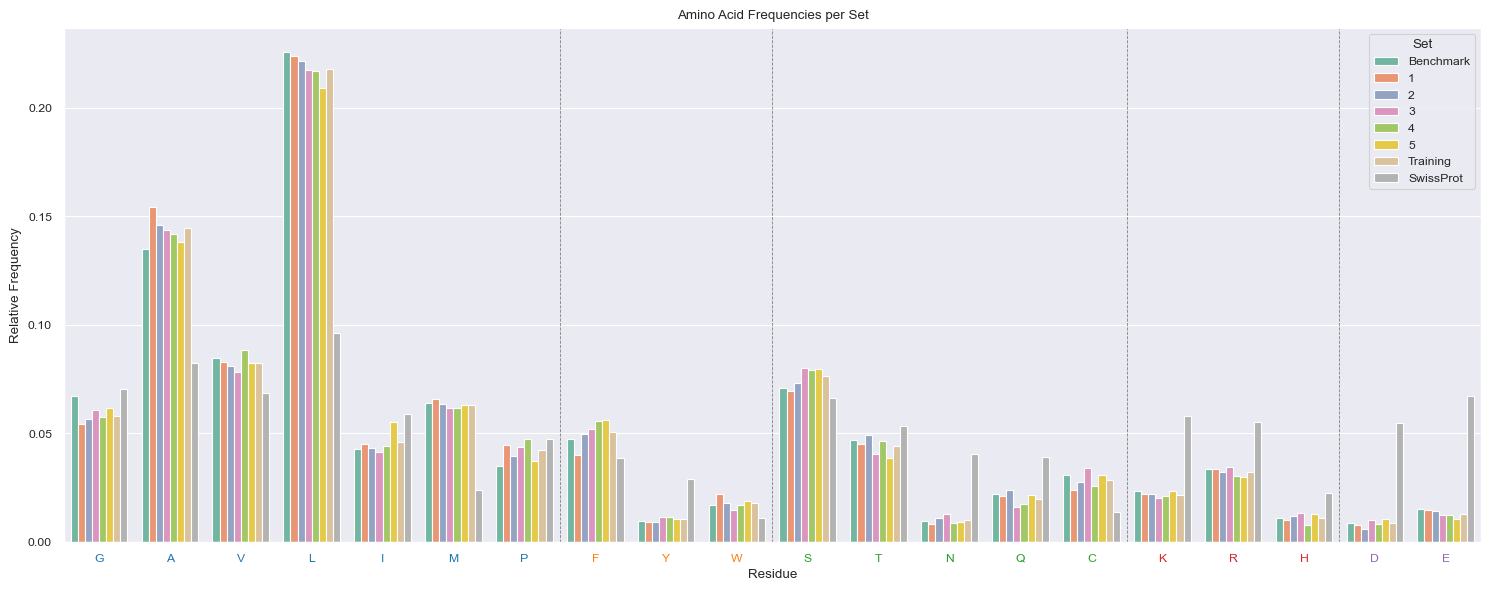

<Figure size 640x480 with 0 Axes>

In [149]:

# barplot with aa frequnecies divided by sets
plt.figure(figsize=(15,6))
ax = sns.barplot(data=all_df, x="Residue", y="Frequency", hue="Set", order=aa_order, palette="Set2")

#adding vertical lines
for x in group_boundaries:
    ax.axvline(x=x, color='gray', linestyle='--', linewidth=0.6)
# xtick labels are colored based on categories 
cat_colors = {'nonpolar':'#1f77b4', 'aromatic':'#ff7f0e', 'polar':'#2ca02c', 'positive':'#d62728', 'negative':'#9467bd'}
for label in ax.get_xticklabels():
    aa = label.get_text()
    cat = res_to_cat.get(aa, None)
    if cat:
        label.set_color(cat_colors[cat])

# adding legend to the plot
plt.legend(handles=legend_handles, labels=legend_labels, title="Residue category", loc='upper right')
#plt.savefig("frequencies_sp_train_vs_swissprot.png", dpi=300, bbox_inches="tight")

ax.set_xlabel("Residue")
ax.set_ylabel("Relative Frequency")
ax.set_title("Amino Acid Frequencies per Set")
plt.legend(title="Set")
plt.tight_layout()
plt.show()
plt.savefig("Sequence_lengths_comparison/AminoAcid_Frequencies_Set.png", dpi=300, bbox_inches="tight")

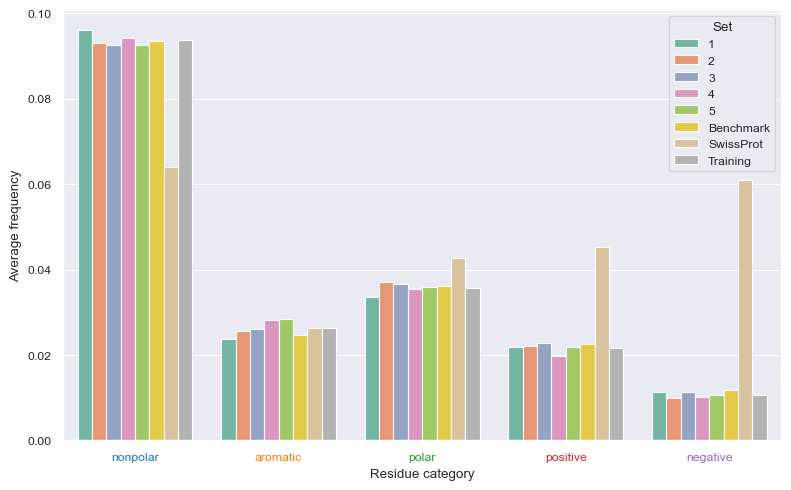

<Figure size 640x480 with 0 Axes>

In [150]:
#barplot for aminoacids composition based on chemical-physiucal properties, divided by sets
all_df['category'] = all_df['Residue'].map(res_to_cat)
#column residue imust be Categorical and ordered
all_df['Residue'] = pd.Categorical(all_df['Residue'], categories=aa_order, ordered=True)
# barplot with cathegories 
df_agg = all_df.groupby(['category', 'Set'], as_index=False)['Frequency'].mean()

#barplot
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_agg, x='category', y='Frequency', hue='Set', order=aa_categories, palette="Set2")

# Personalised legend
for label in ax.get_xticklabels():
    cat = label.get_text()
    label.set_color(cat_colors[cat])

ax.set_xlabel("Residue category")
ax.set_ylabel("Average frequency")
ax.set_ylabel("Average frequency")
plt.tight_layout()
plt.show()
plt.savefig("Sequence_lengths_comparison/Frequencies_propierties:Set.png", dpi=300, bbox_inches="tight")

C:\Users\utente\AppData\Local\Temp\ipykernel_14220\2125483416.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


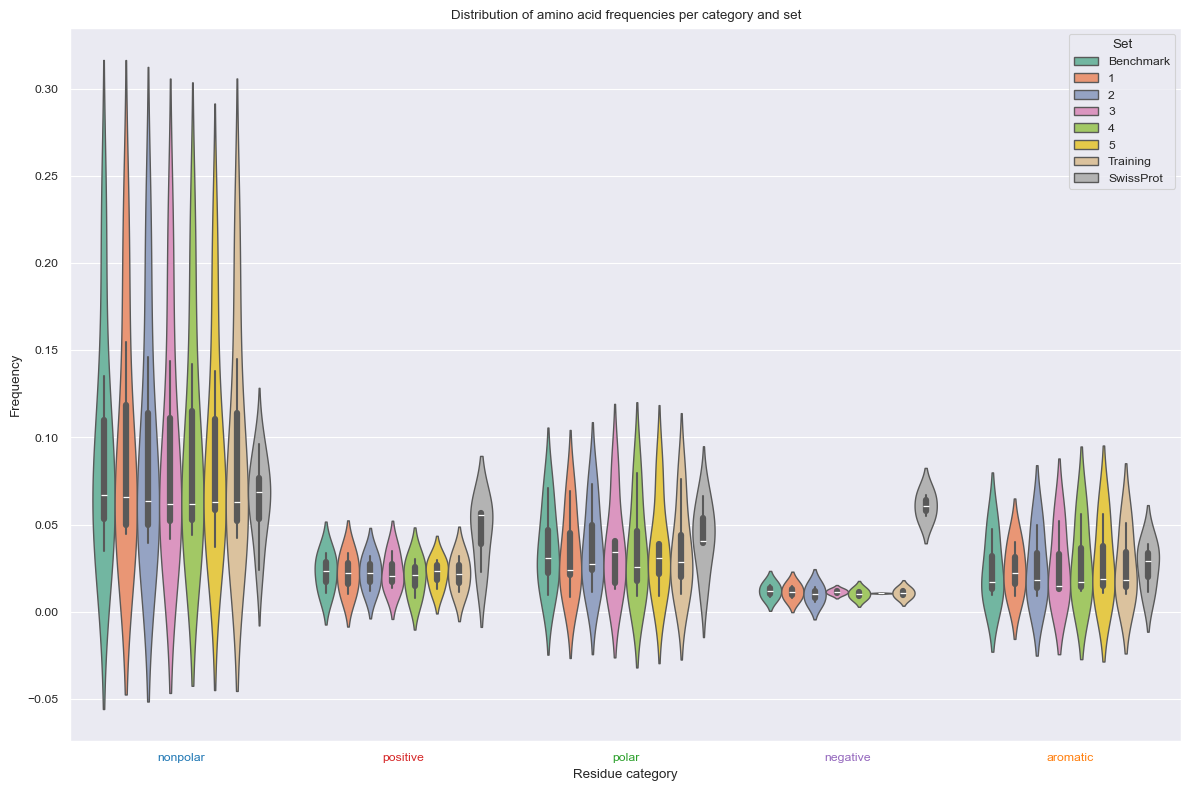

<Figure size 640x480 with 0 Axes>

In [151]:

plt.figure(figsize=(12,8))
# Violin plot
ax = sns.violinplot(
    data=all_df,
    x='category',        # categories
    y='Frequency',       # frequences 
    hue='Set',        
    split=False,         # two violins
    palette="Set2",
    inner="box",         
    scale="width"        
)

# xtick labels colored
for label in ax.get_xticklabels():
    cat = label.get_text()
    label.set_color(cat_colors[cat])

ax.set_xlabel("Residue category")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of amino acid frequencies per category and set")
plt.legend(title="Set", loc='upper right')
plt.tight_layout()
plt.show()
plt.savefig("Sequence_lengths_comparison/Violin_Distribution_Set.png", dpi=300, bbox_inches="tight")

## **Pie Plot and Bar Plots of Taxonomic classification**

In [ ]:
df=pd.read_csv("../Data_Preparation/train_bench.tsv", sep="\t")
print("Number of OrganismName unique values: ",df["OrganismName"].nunique())


Number of OrganismName unique values:  435


In [155]:
#Recover the ten most frequent OrganismName to make the unique value number of OrganismName field comparable to Kingdom field unique value number
tmp_var=df.groupby('OrganismName').nunique().sort_values(by='EntryID', ascending=False).head(6).reset_index()
tmp_most_rep=tmp_var['OrganismName'].tolist()
df.loc[~df["OrganismName"].isin(tmp_most_rep), "OrganismName"] = "Other"
print("Number of OrganismName unique values: ",df["OrganismName"].nunique())

Number of OrganismName unique values:  7


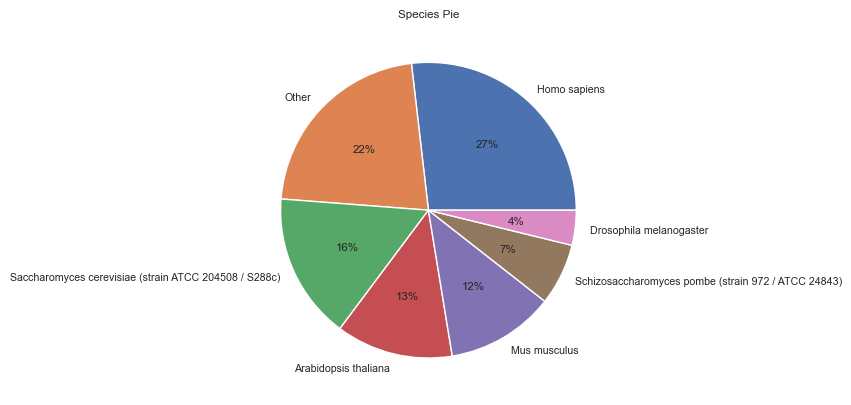

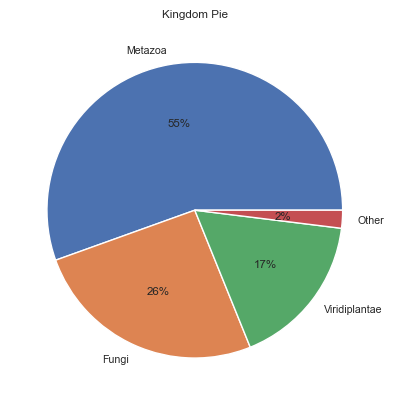

<Figure size 640x480 with 0 Axes>

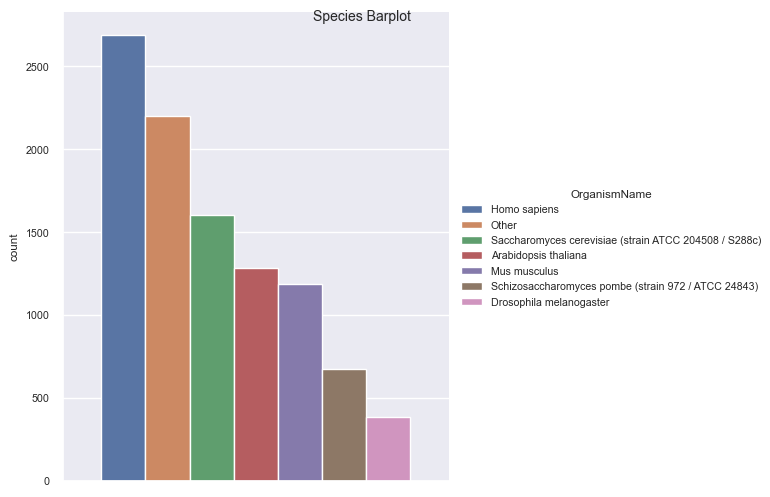

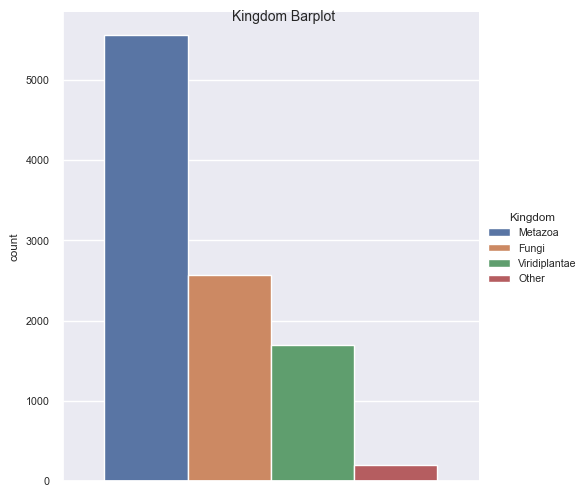

In [156]:

#Create the pie plot with respect of OrganismName
sns.set_theme(context='notebook', style='darkgrid', palette='deep',font='sans-serif', font_scale=0.7,color_codes=True,rc=None)
counts_organismname=df['OrganismName'].value_counts()
plt.pie(counts_organismname, labels=counts_organismname.index,autopct='%1.0f%%')
plt.title("Species Pie")
plt.show()
plt.savefig("Taxonomy_classification/species_pie.png", dpi=300, bbox_inches="tight")

#Create the pie plot with respect of Kingdom
counts_kingdom=df['Kingdom'].value_counts()
plt.pie(counts_kingdom, labels=counts_kingdom.index,autopct='%1.0f%%')
plt.title("Kingdom Pie")
plt.show()
plt.savefig("Taxonomy_classification/kingdom_pie.png", dpi=300, bbox_inches="tight")

custom_palette = {
    "Bacteria": "skyblue",
    "Archaea": "orange",
    "Eukaryota": "green"
}

#Create the barplot with respect of OrganismName
counts_organismname=counts_organismname.to_frame(name="count")
sns.catplot(counts_organismname, 
            #x="OrganismName",
            y="count", 
            hue = "OrganismName",
            kind='bar',
            palette = "deep"
            ).set_xticklabels(rotation=90).fig.suptitle("Species Barplot")   
plt.savefig("Taxonomy_classification/species_barplot.png", dpi=300, bbox_inches="tight")

#Create the barplot with respect of Kingdom
counts_kingdom=counts_kingdom.to_frame(name="count")
sns.catplot(counts_kingdom, 
            #x="Kingdom",
            y="count", 
            hue = "Kingdom",
            kind='bar', 
            palette = "deep"
            ).fig.suptitle("Kingdom Barplot")
plt.savefig("Taxonomy_classification/kingdom_barplot.png", dpi=300, bbox_inches="tight")

## **SEQUENCELOGO DATASET** 

## SeqLogo of benchmark sequences

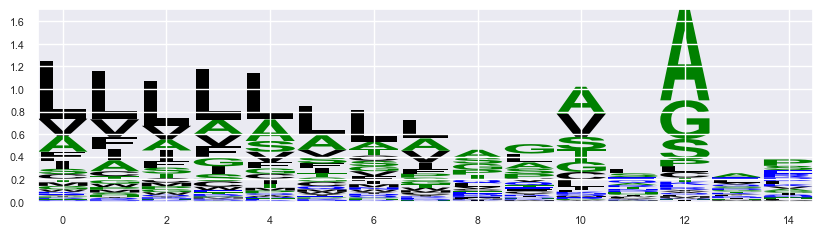

In [157]:
#We need to select the positive and benchmark sequences from the original dataframe
bench_pos=df.query('Class=="Positive" and Set=="Benchmark"')
#you have to recover the region -12 and +3 after cleavage site
bench_seqs=[]
for index,row in bench_pos.iterrows():
        sequence_to_recover=row["Sequence"]
        cleavage_position=int(row["SPEnd"])
        bench_seqs.append(sequence_to_recover[cleavage_position-13:cleavage_position+2])

# Information matrix used to construct the sequence logo
ww_counts_df = lm.alignment_to_matrix(sequences=bench_seqs, to_type='information',characters_to_ignore='.-X') #create a matrix that will be used to build the logo, with the frequencies of the aminoacid in that position

#draw the sequence logo
lm.Logo(ww_counts_df,color_scheme="hydrophobicity")
plt.savefig("SequenceLogo/sequence_logo_benchmark.png", dpi=300, bbox_inches="tight")

## SeqLogo of training sequences

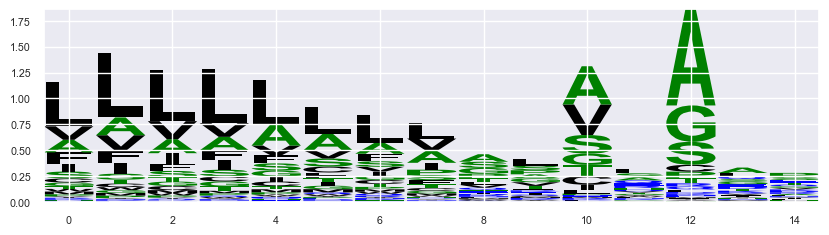

In [158]:
#We need to select the positive and training sequences from the original dataframe
train_pos=df.query('Class=="Positive" and (Set=="1" or Set=="2" or Set=="3" or Set=="4" or Set=="5")')
train_seqs=[]
#you have to recover -12 from SPend and +3 after SPend
for index,row in train_pos.iterrows():
        sequence_to_recover=row["Sequence"]
        cleavage_position=int(row["SPEnd"])
        train_seqs.append(sequence_to_recover[cleavage_position-13:cleavage_position+2])
    
# Information matrix used to construct the sequence logo
ww_counts_df = lm.alignment_to_matrix(sequences=train_seqs, to_type='information',characters_to_ignore='.-X') #create a matrix that will be used to build the logo, with the frequencies of the aminoacid in that position

#draw the sequence logo
logo=lm.Logo(ww_counts_df,color_scheme="hydrophobicity")
plt.savefig("SequenceLogo/sequence_logo_training.png", dpi=300, bbox_inches="tight")


<Figure size 600x1400 with 0 Axes>

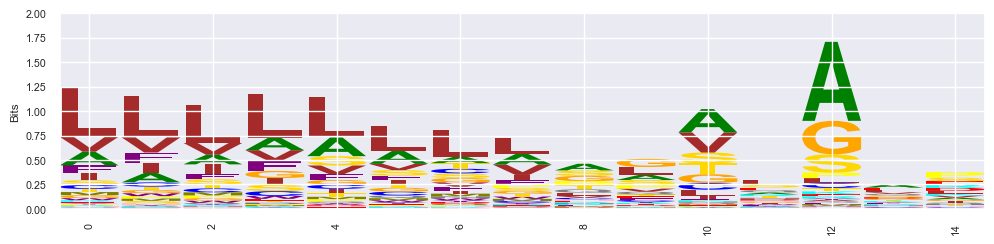

In [ ]:
import logomaker as lm 

# Information matrix used to construct the sequence logo
ww_counts_df = lm.alignment_to_matrix(sequences=bench_seqs, to_type='information',characters_to_ignore='.-X') #create a matrix that will be used to build the logo, with the frequencies of the aminoacid in that position
custom_colors = {
        'A': 'green',
        'C': 'blue',
        'D': 'red',
        'E': 'red',
        'F': 'purple',
        'G': 'orange',
        'H': 'pink',
        'I': 'brown',
        'K': 'cyan',
        'L': 'brown',
        'M': 'olive',
        'N': 'gray',
        'P': 'yellow',
        'Q': 'gray',
        'R': 'cyan',
        'S': 'gold',
        'T': 'gold',
        'V': 'brown',
        'W': 'purple',
        'Y': 'purple',
        '-': 'white',
    }
#plot the sequence logo
plt.figure(figsize=(6,14))
lm.Logo(ww_counts_df, shade_below=.5, fade_below=.5, color_scheme=custom_colors)

# Customize the appearance

plt.xticks(rotation=90)
plt.ylabel("Bits")
plt.ylim(0, 2.0)  # Adjust the maximum Y-axis limit
plt.tight_layout()
plt.savefig("SequenceLogo/sequence_logo_benchmark_colored.png", dpi=300, bbox_inches="tight")
plt.show()